In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math

def savefigs(filename):
  plt.savefig(filename+ '.pdf')
  plt.savefig(filename+ '.eps', format='eps')

In [60]:
data_file = 'data/cordic_mean_err_1e+05_samples.csv'
df = pandas.read_csv(data_file)
df

,num_iters,mean,std,c95l,c95h,al,ah
0,10,2.104525e-06,3.438246e-07,-1.529806e-06,5.738857e-06,-1.634907e-03,1.636896e-03
1,11,1.930877e-07,8.620096e-08,-1.626664e-06,2.012839e-06,-8.167932e-04,8.193507e-04
2,12,3.783915e-07,2.170756e-08,-5.347995e-07,1.291582e-06,-4.086551e-04,4.099822e-04
3,13,3.411294e-07,5.394412e-09,-1.140977e-07,7.963565e-07,-2.047588e-04,2.044216e-04
4,14,-3.342639e-08,1.356012e-09,-2.616643e-07,1.948115e-07,-1.024490e-04,1.022688e-04
5,15,4.067179e-08,3.408178e-10,-7.375223e-08,1.550958e-07,-5.111377e-05,5.105118e-05
6,16,2.723723e-08,8.463374e-11,-2.978285e-08,8.425731e-08,-2.566048e-05,2.556310e-05
7,17,-1.071275e-08,2.125162e-11,-3.928550e-08,1.786000e-08,-1.274107e-05,1.281045e-05
8,18,3.676813e-09,5.327481e-12,-1.062915e-08,1.798277e-08,-6.371406e-06,6.375755e-06
9,19,5.191761e-09,1.328824e-12,-1.953036e-09,1.233656e-08,-3.184284e-06,3.207922e-06


In [61]:
def neg_log(x,smallest_pow = 7):
    return math.log10(x) + smallest_pow if x > 0 else -smallest_pow -math.log10(-x)


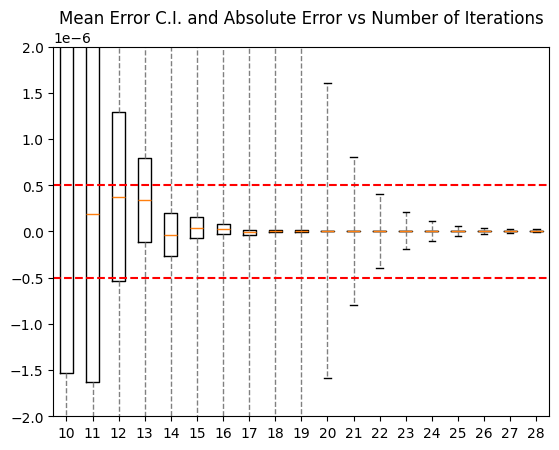

In [62]:
fig,ax = plt.subplots()

data = df

ax.set_xticks([])
boxes = [{
    'label': f'{row["num_iters"]:.0f}',
    'whislo': row['al'],    # Bottom whisker position
    'q1'    : row['c95l'],    # First quartile (25th percentile)
    'med'   : row['mean'],    # Median         (50th percentile)
    'mean'  : row['mean'],    # Median         (50th percentile)
    'q3'    : row['c95h'],    # Third quartile (75th percentile)
    'whishi': row['ah'],    # Top whisker position
    'fliers': [] 
} for index, row in data.iterrows()]

# boxes = [{
#     'label':'test',
#     'whislo': -1.5,    # Bottom whisker position
#     'q1'    : -1,    # First quartile (25th percentile)
#     'med'   : 0,    # Median         (50th percentile)
#     'q3'    : 1,    # Third quartile (75th percentile)
#     'whishi': 1.5,    # Top whisker position
#     'fliers': [] 
# }]


ax.bxp(boxes, whiskerprops=dict(linestyle='--', color='gray'))
# ax.set_yscale('symlog')
plt.axhline(y=0.5e-6, color='r', linestyle='--')
plt.axhline(y=-0.5e-6, color='r', linestyle='--')
ax.set_ylim(-2e-6,2e-6)
ax.set_title('Mean Error C.I. and Absolute Error vs Number of Iterations')
# savefigs('./img/cordic_mean_err_1e5samp')
# ax.legend()
plt.show()

In [67]:
data_file = './data/cordic_mean_err_fracbit3_1e+04_samples.csv'
df = pandas.read_csv(data_file)
df

,num_iters,frac_bits,mean,std,c95l,c95h,al,ah,mse
0,14,19,6.874866e-06,1.346812e-09,6.155567e-06,0.000008,-0.000096,0.000112,1.394076e-09
1,15,19,7.483610e-06,3.516034e-10,7.116089e-06,0.000008,-0.000049,0.000067,4.076078e-10
2,16,19,7.845826e-06,9.161856e-11,7.658220e-06,0.000008,-0.000023,0.000043,1.531755e-10
3,17,19,8.420285e-06,3.076751e-11,8.311566e-06,0.000009,-0.000014,0.000031,1.016687e-10
4,14,20,4.561481e-06,1.375866e-09,3.834465e-06,0.000005,-0.000098,0.000107,1.396673e-09
5,15,20,4.163032e-06,3.393060e-10,3.801995e-06,0.000005,-0.000047,0.000059,3.566368e-10
6,16,20,4.682448e-06,8.686865e-11,4.499770e-06,0.000005,-0.000025,0.000033,1.087940e-10
7,17,20,4.781548e-06,2.379514e-11,4.685939e-06,0.000005,-0.000012,0.000022,4.665834e-11
8,14,21,1.232690e-06,1.334946e-09,5.165663e-07,0.000002,-0.000099,0.000103,1.336466e-09
9,15,21,1.788430e-06,3.332849e-10,1.430610e-06,0.000002,-0.000049,0.000055,3.364834e-10


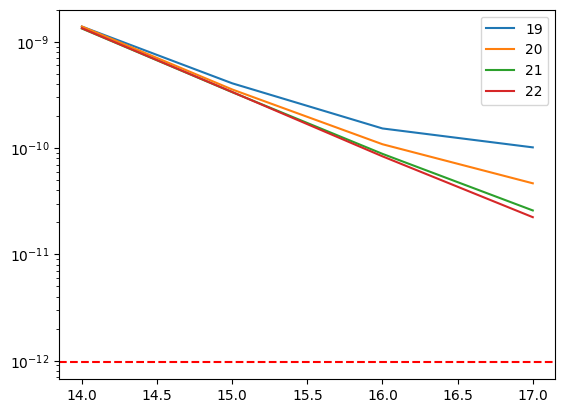

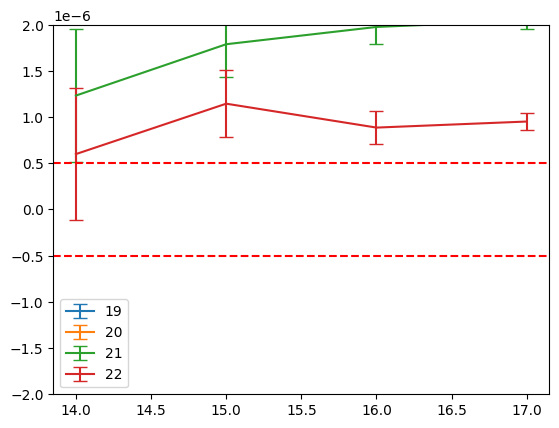

In [68]:
grouped = df.groupby('frac_bits')

fig,ax = plt.subplots()

for frac_bit,group in grouped:
    ax.plot(group['num_iters'],abs(group['mse']),label=f'{frac_bit:.0f}')
plt.axhline(y=9.604e-13, color='r', linestyle='--')
ax.set_yscale('log')
ax.legend()

fig,ax = plt.subplots()
for frac_bit,group in grouped:
    errs = np.stack((group['mean'] - group['c95l'], group['c95h']-group['mean']))
    ax.errorbar(group['num_iters'],group['mean'],yerr=errs,label=f'{frac_bit:.0f}',capsize=5)
plt.axhline(y=0.5e-6, color='r', linestyle='--')
plt.axhline(y=-0.5e-6, color='r', linestyle='--')
ax.set_ylim(-2e-6,2e-6)

ax.legend()
    
plt.show()